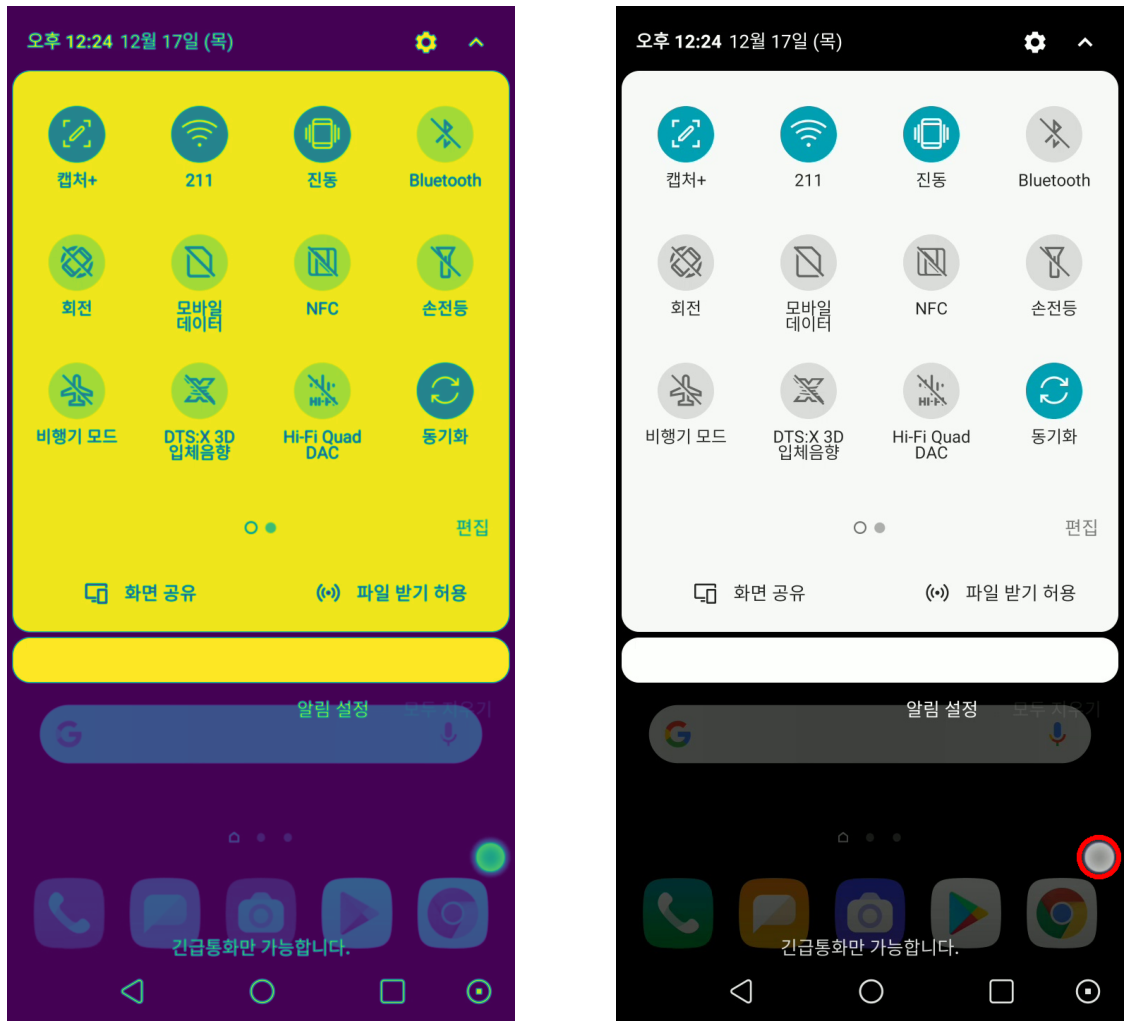

In [78]:
## Gaussian & Hough circle Test 

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# file_path = '/home/yousungchoi/projects/project_coordination/workspace/training_demo/images/inference_check'
# image_path = os.path.join(file_path, 'images0500_resized_linear.jpg')
file_path = '/home/yousungchoi/projects/project_coordination/workspace/training_demo/images/inference_original_image'
image_path = os.path.join(file_path, 'images2470.jpg') 
# image_path = os.path.join(file_path, 'images0500.jpg') 

image_cv2 = cv2.imread(image_path, cv2.IMREAD_COLOR)
image_gray = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2GRAY)
image_gray_blur = cv2.GaussianBlur(image_gray, (3,3), 0)

circles = cv2.HoughCircles(image_gray_blur, cv2.HOUGH_GRADIENT, 1, 100, param1=150, param2=30, minRadius=20, maxRadius=22) # original image marginal value

drawing = image_cv2.copy()
drawing = cv2.cvtColor(drawing, cv2.COLOR_BGR2RGB)
for i in circles[0]:
    cv2.circle(drawing, (i[0], i[1]), int(i[2]+8), (255, 0, 0), 5)
    
plt.rcParams['figure.figsize'] = [20, 20]
images = [image_gray_blur, drawing]

for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i])
    plt.axis('off')



In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [6]:
# file_path = '/home/yousungchoi/projects/project_coordination/workspace/training_demo/images/inference_check'
file_path = '/home/yousungchoi/projects/project_coordination/workspace/training_demo/images/inference_original_image'
file_names = os.listdir(file_path)
file_names.sort()
print(file_names[:5])
print(len(file_names), "files are in directory")

['720_1440_Test_Video_generation_test.mp4', '720x1440_Test_Video.mp4', 'Screenshot_white_background_test.png', 'images0026.jpg', 'images0027.jpg']
1053 files are in directory


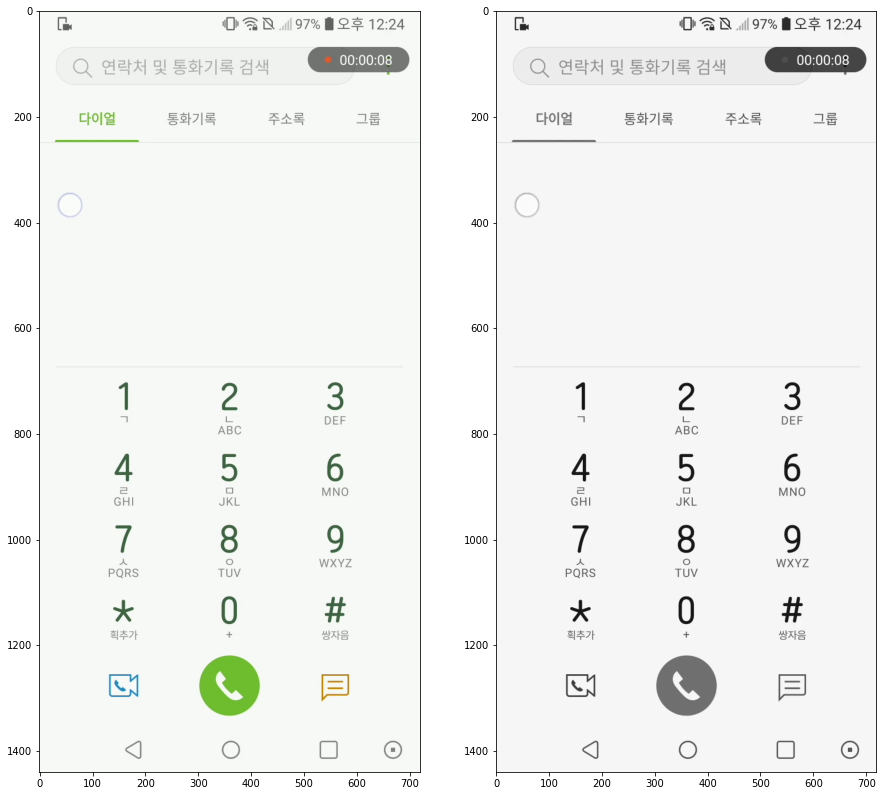

In [4]:
# show color / gray images 

file_path = '/home/yousungchoi/projects/project_coordination/workspace/training_demo/images/inference_original_image'
# image_path = os.path.join(file_path, 'images0500_resized_linear.jpg')
image_path = os.path.join(file_path, 'images0500.jpg') 
# image_path = os.path.join(file_path, 'Screenshot_white_background_test.png')
image_cv2 = cv2.imread(image_path, cv2.IMREAD_COLOR)

image_np = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2GRAY)

images = [image_np, image_gray]

plt.rcParams['figure.figsize'] = [15, 15]
for i, image in enumerate(images):
    plt.subplot(1, 2, i + 1)
    plt.imshow(image) if i == 0 else plt.imshow(image, 'gray')



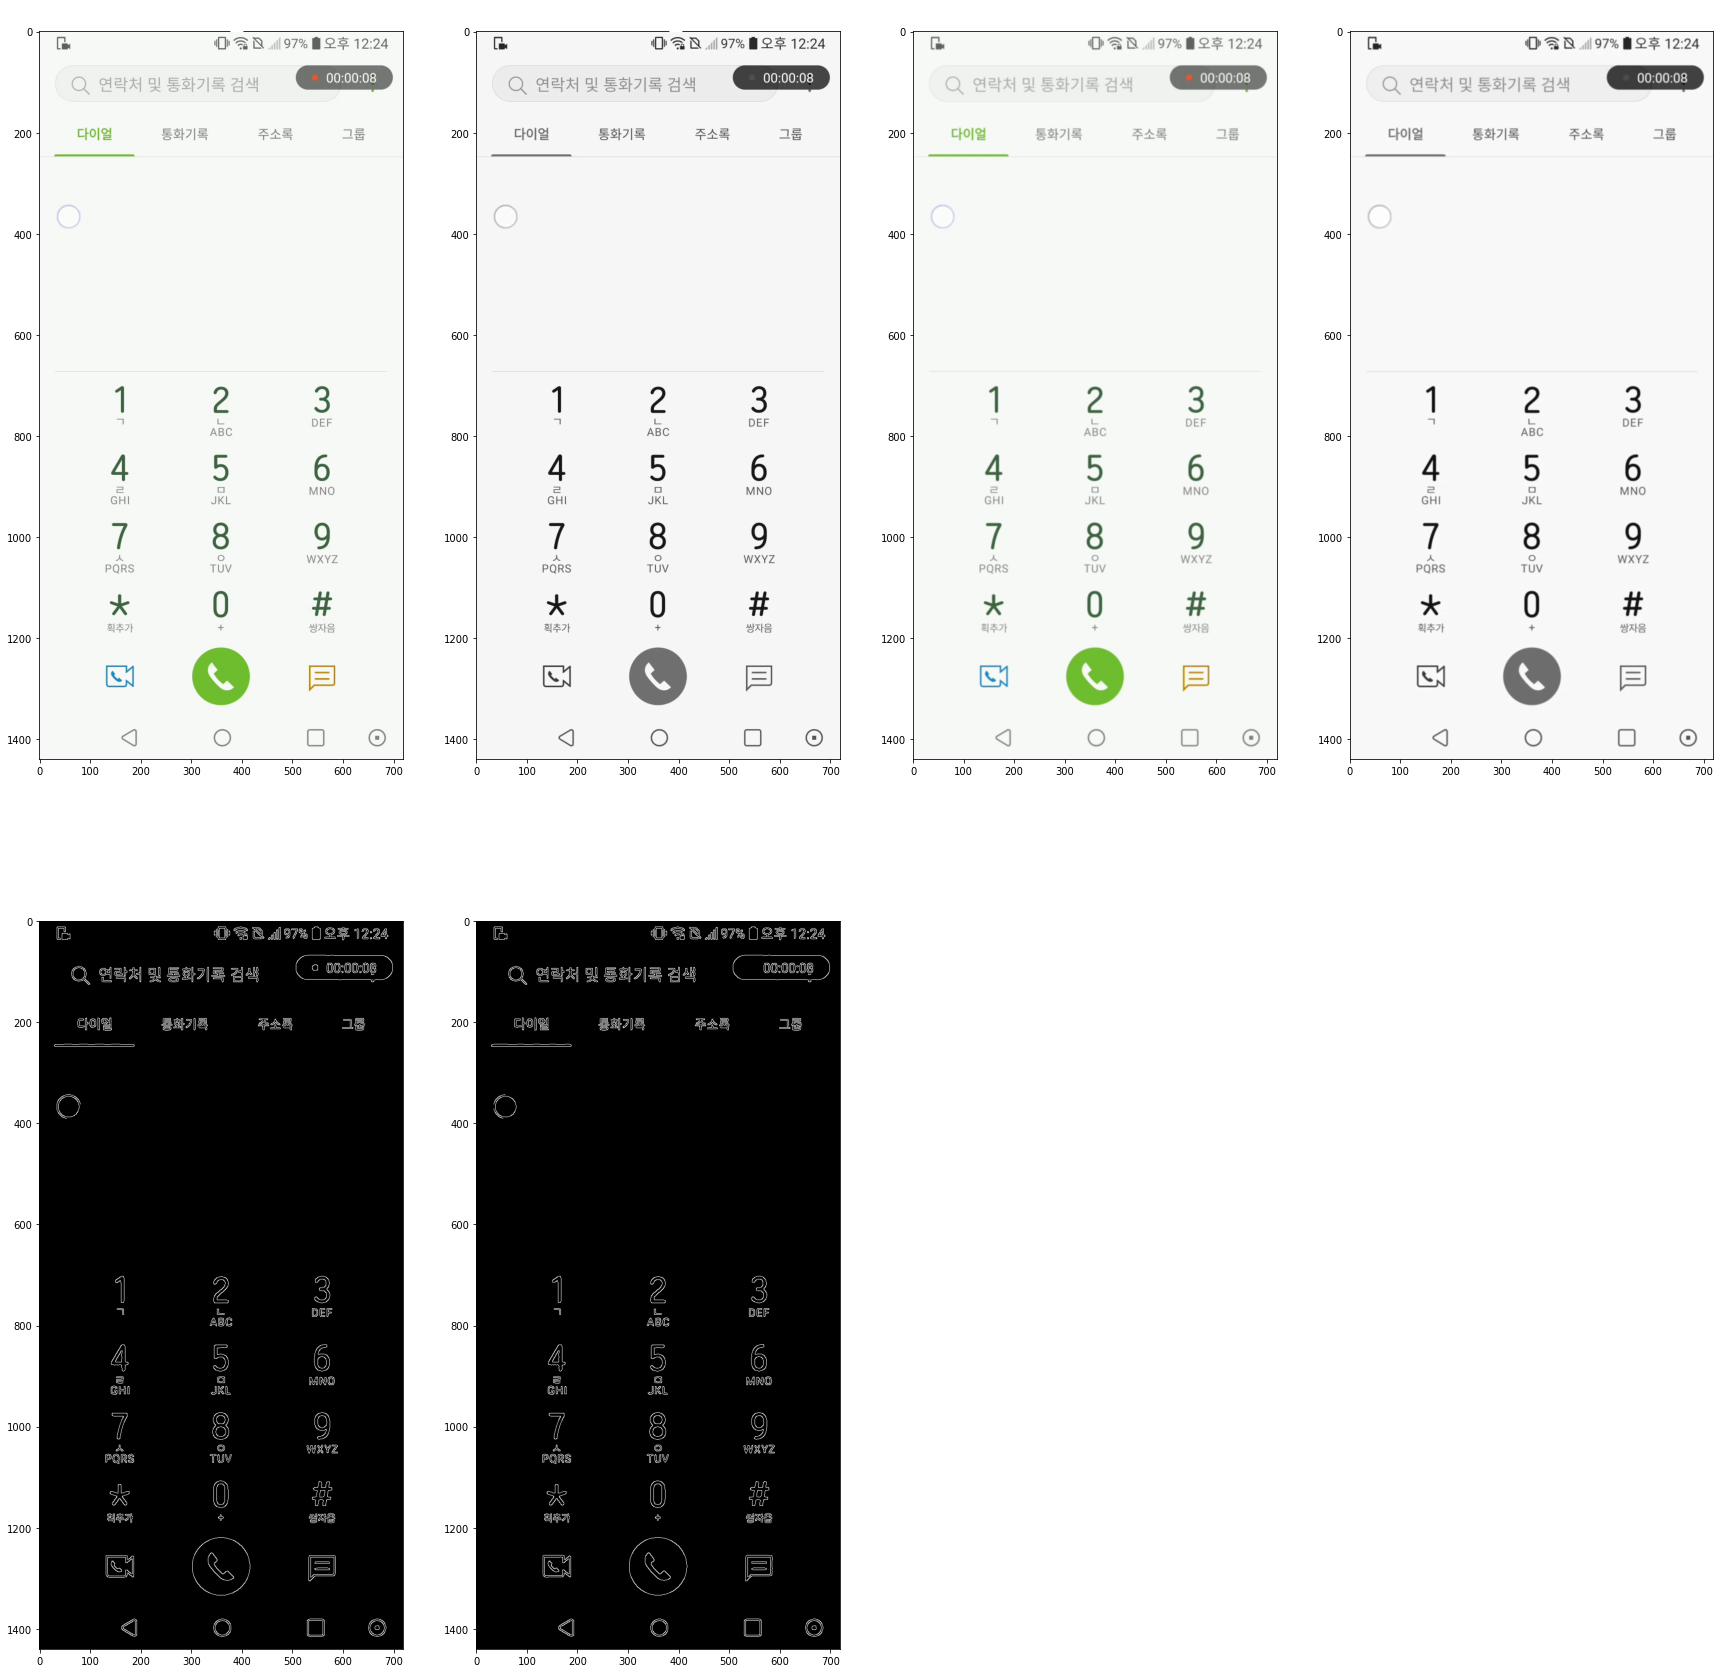

In [5]:
# add blur, canny filter to gray image

images = [image_np, image_gray]
plt.rcParams['figure.figsize'] = [30, 30]

image_color_blur = cv2.GaussianBlur(image_np, (3,3), 0)
image_gray_blur = cv2.GaussianBlur(image_gray, (3,3), 0)
images.append(image_color_blur)
images.append(image_gray_blur)

image_color_blur_canny = cv2.Canny(image_color_blur, 110, 150)
image_gray_blur_canny = cv2.Canny(image_gray_blur, 110, 150)
images.append(image_color_blur_canny)
images.append(image_gray_blur_canny)

titles = ['original_color', 'original_gray', 'color + blur', 'gray + blur', 'color + blur + canny', 'gray + blur + canny']

for i, image in enumerate(images):
    plt.subplot(2, 4, i + 1)
    plt.imshow(image, 'gray') if i%2 == 1 or i == 4 else plt.imshow(image)
    plt.title(titles[i], color='WHITE', size=25)
    
   

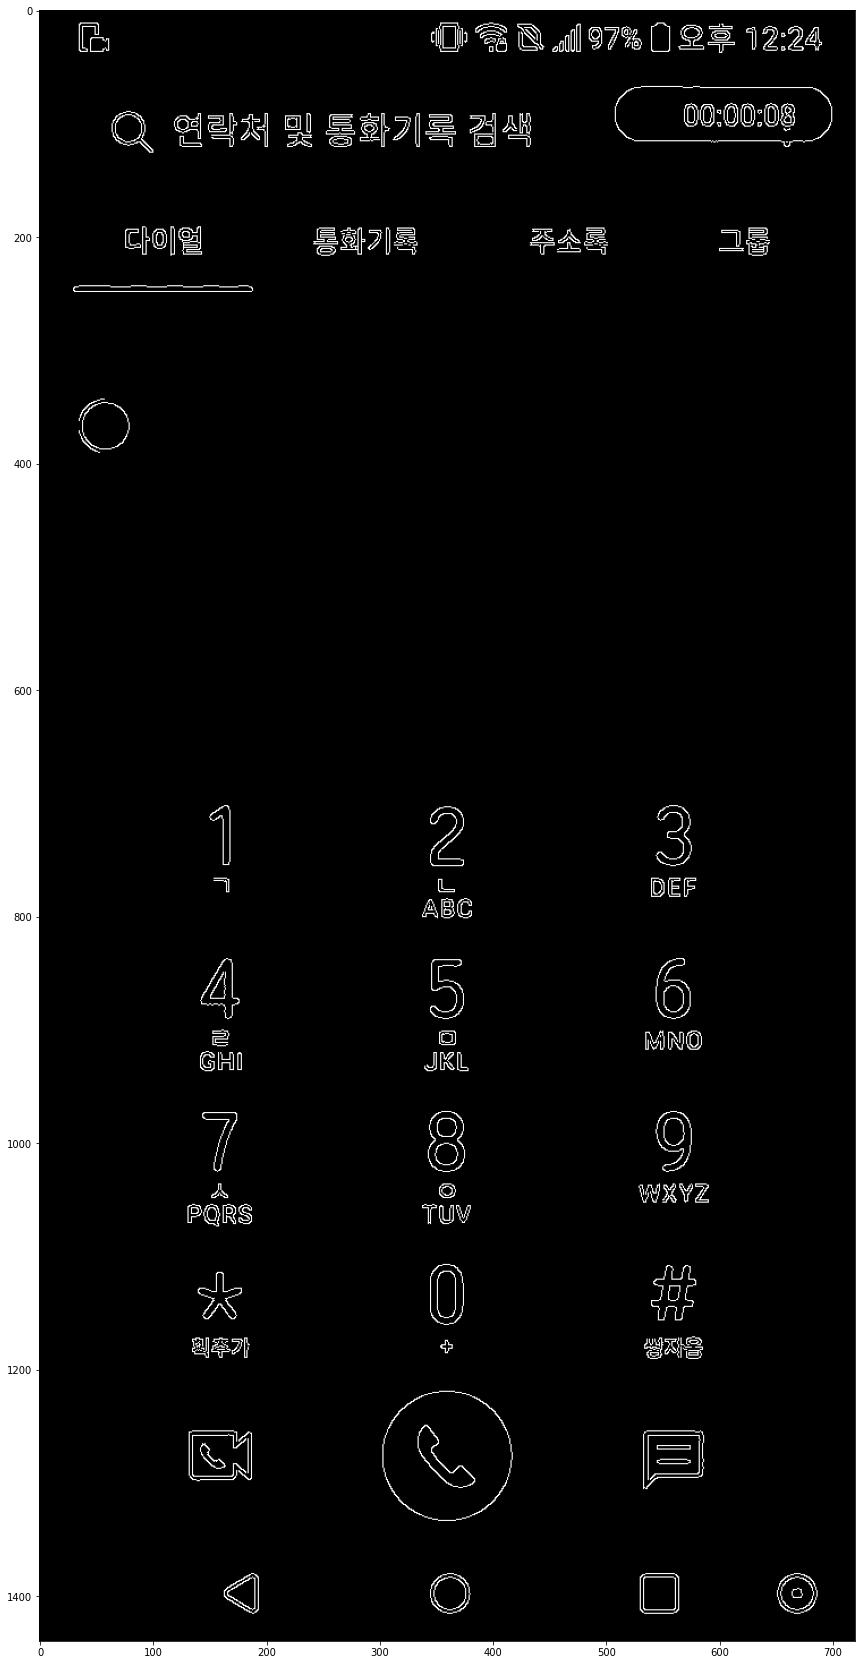

In [96]:
plt.imshow(image_gray_blur_canny, 'gray')

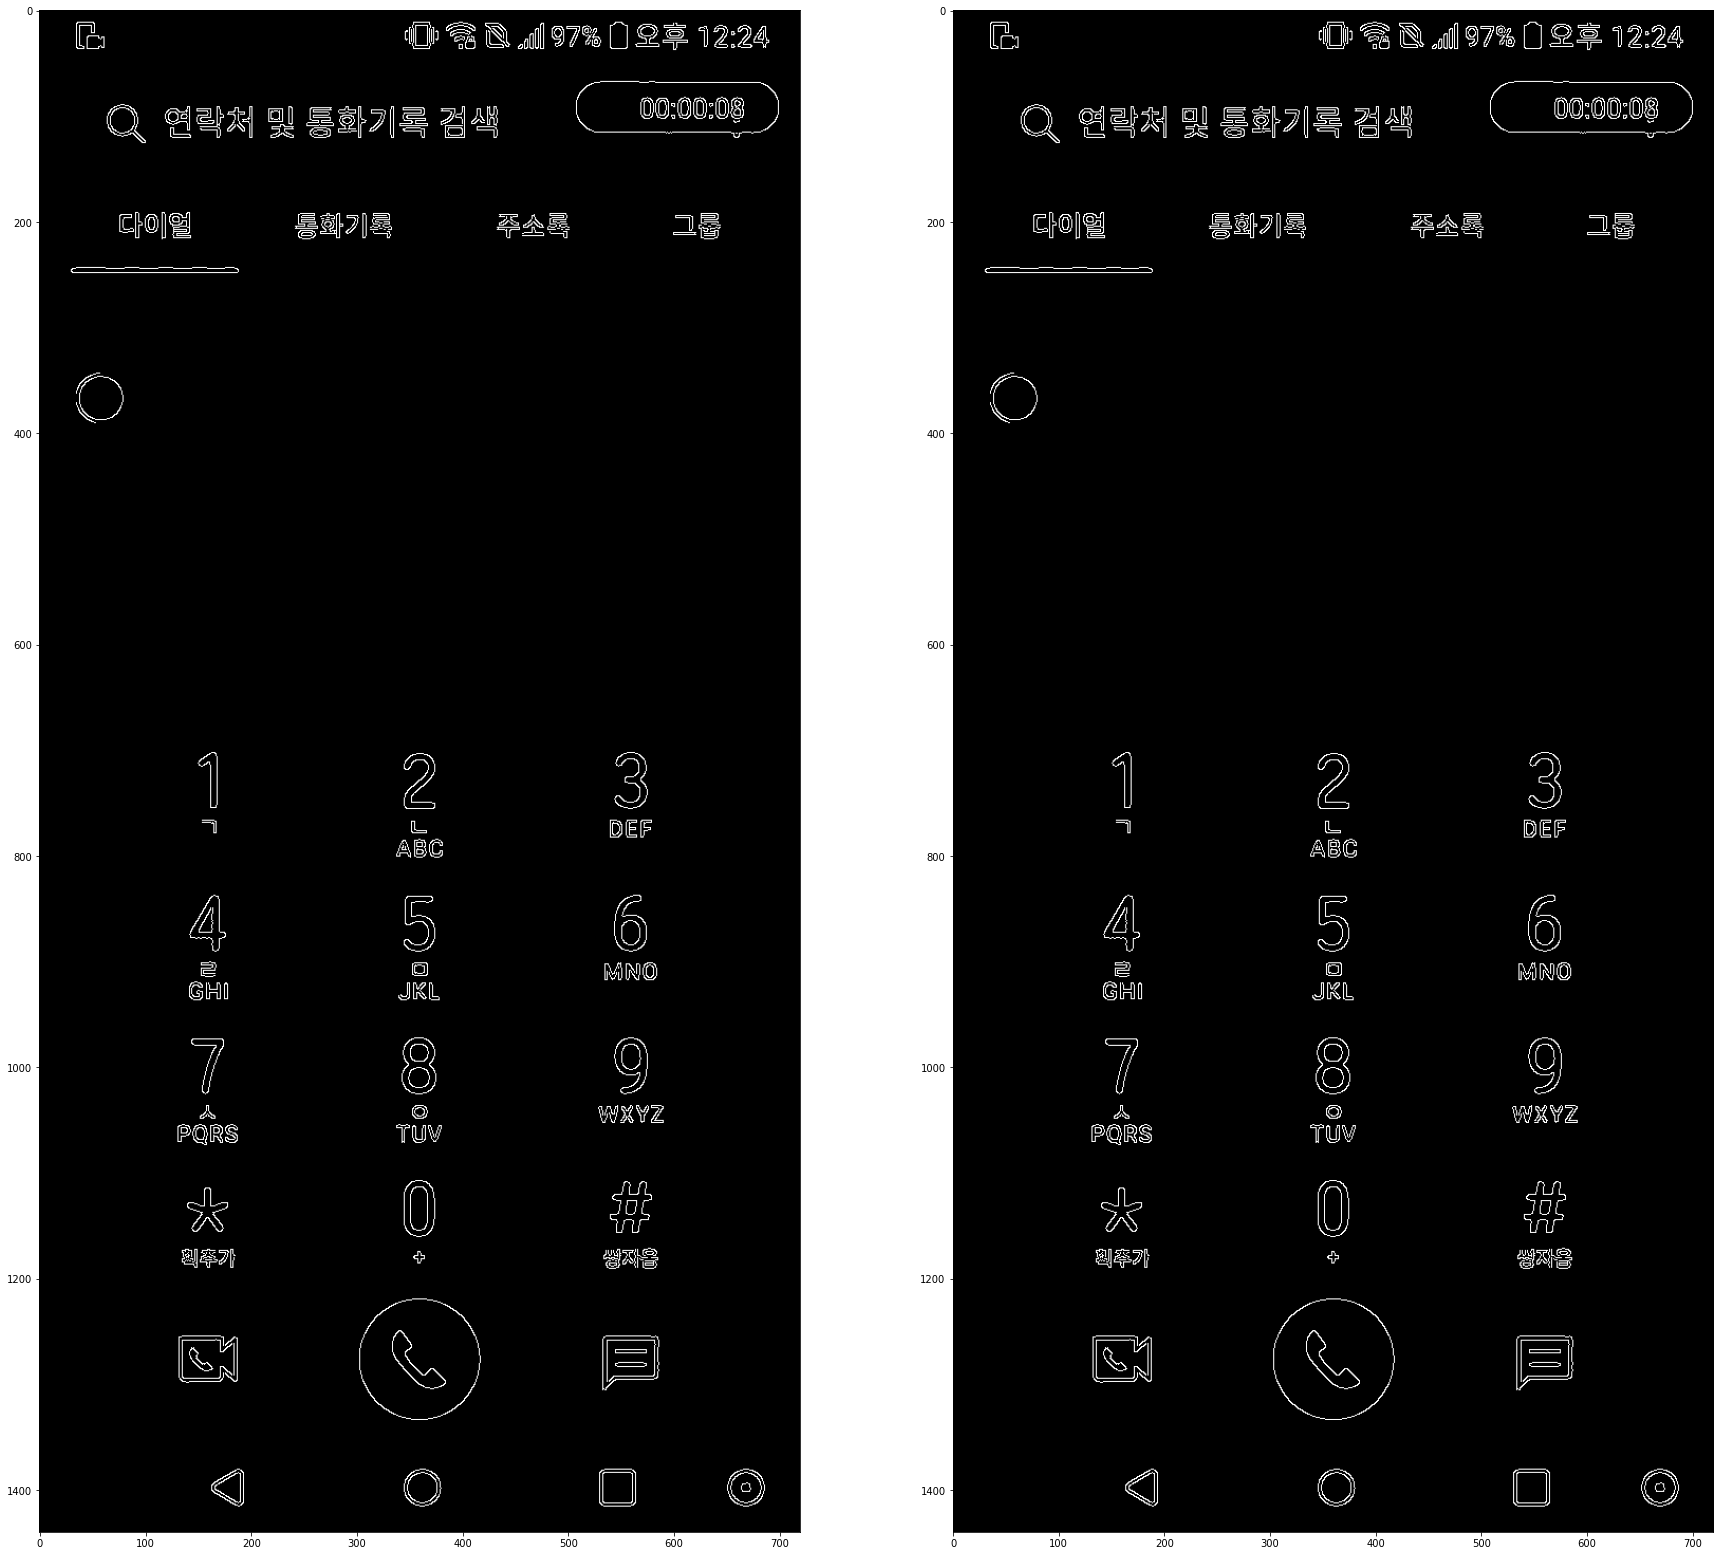

In [97]:
ret, thresh = cv2.threshold(image_gray_blur_canny, 127, 255, 0)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

images = [image_gray_blur_canny, thresh]

for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
    

In [98]:
print(len(contours))

426


In [99]:
boundRect = [None] * len(contours)			
for i, contour in enumerate(contours):  
	contours_poly = cv2.approxPolyDP(contour, 3, True) #Contour 추정 (Contour Point 수 줄여서 간소화)
	boundRect[i] = cv2.boundingRect(contours_poly) # Get Straight Rectangle
    
print(len(boundRect))

426


In [100]:
boundRect_new = []
for i in range(len(boundRect)):
    # Code for reshaped image (640 640)
#     if boundRect[i][2] > boundRect[i][3]*2*0.9 and boundRect[i][2] < boundRect[i][3]*2*1.1 and boundRect[i][2] < 70 and boundRect[i][3] > 30:
    # Code for original image
    if boundRect[i][2] > boundRect[i][3]*0.9 and boundRect[i][2] < boundRect[i][3]*1.1 and boundRect[i][2] < 48 and boundRect[i][2] > 40:
        print(i, boundRect[i])
        boundRect_new.append(boundRect[i])
        
print(len(boundRect_new))

30 (132, 1254, 43, 45)
180 (38, 346, 42, 42)
181 (38, 346, 42, 42)
3


In [101]:
boundRect = boundRect_new.copy()

In [102]:
# drawing = np.zeros((image_gray_blur_canny.shape[0], image_gray_blur_canny.shape[1], 3), dtype=np.uint8)

In [103]:
drawing = image_gray_blur_canny.copy()

In [104]:
print(boundRect)

[(132, 1254, 43, 45), (38, 346, 42, 42), (38, 346, 42, 42)]


In [105]:
import random as rng
    # Draw polygonal contour + bonding rects + circles
# for i in range(len(contours)):
for i in range(len(boundRect)):
#     color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    color = (255, 0, 0)
#     cv2.drawContours(drawing, contours_poly, i, color)
#     cv2.rectangle(drawing, (int(boundRect[i][0]+i*10), int(boundRect[i][1])+i*10), \
#       (int(boundRect[i][0]+boundRect[i][2]+i*10), int(boundRect[i][1]+boundRect[i][3]+i*10)), color, 2)
    cv2.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
      (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
#     cv2.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)

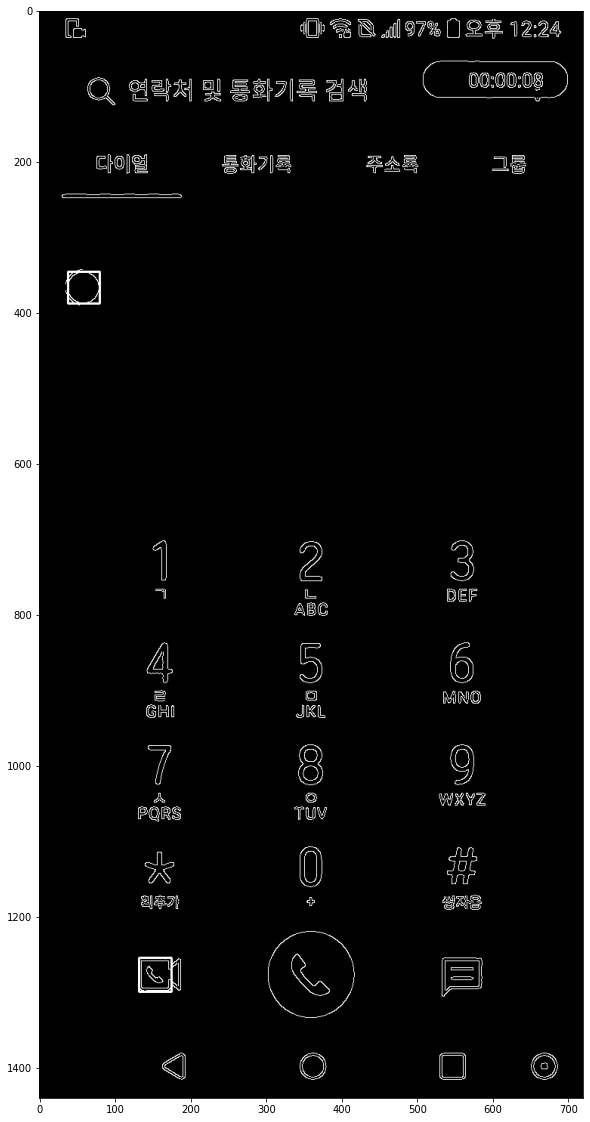

In [110]:
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(drawing, 'gray')

In [13]:
# file_path = '/home/yousungchoi/projects/project_coordination/workspace/training_demo/images/inference_check'
# image_path = os.path.join(file_path, 'images0500_resized_linear.jpg')
file_path = '/home/yousungchoi/projects/project_coordination/workspace/training_demo/images/inference_original_image'
image_path = os.path.join(file_path, 'images0100.jpg') 
# image_path = os.path.join(file_path, 'images0500.jpg') 
# image_path = os.path.join(file_path, 'Screenshot_white_background_test.png') 

image_cv2 = cv2.imread(image_path, cv2.IMREAD_COLOR)
image_gray = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2GRAY)
image_gray_blur = cv2.GaussianBlur(image_gray, (3,3), 0)

In [14]:
#  circles = cv2.HoughCircles(image_gray_blur, cv2.HOUGH_GRADIENT, 1, 200, param1=110, param2=20, minRadius=30, maxRadius=34) # reshaped (640x640) image marginal value
# circles = cv2.HoughCircles(image_gray_blur, cv2.HOUGH_GRADIENT, 1, 100, param1=150, param2=20, minRadius=20, maxRadius=22) # original image marginal value
circles = cv2.HoughCircles(image_gray_blur, cv2.HOUGH_GRADIENT, 1, 100, param1=150, param2=30, minRadius=20, maxRadius=22) # original image marginal value

In [15]:
print(circles)
print(circles.shape)

[[[546.5  159.5   20.35]]]
(1, 1, 3)


In [28]:
drawing = image_cv2.copy()
drawing = cv2.cvtColor(drawing, cv2.COLOR_BGR2RGB)
for i in circles[0]:
    cv2.circle(drawing, (i[0], i[1]), int(i[2]), (255, 0, 0), 5)

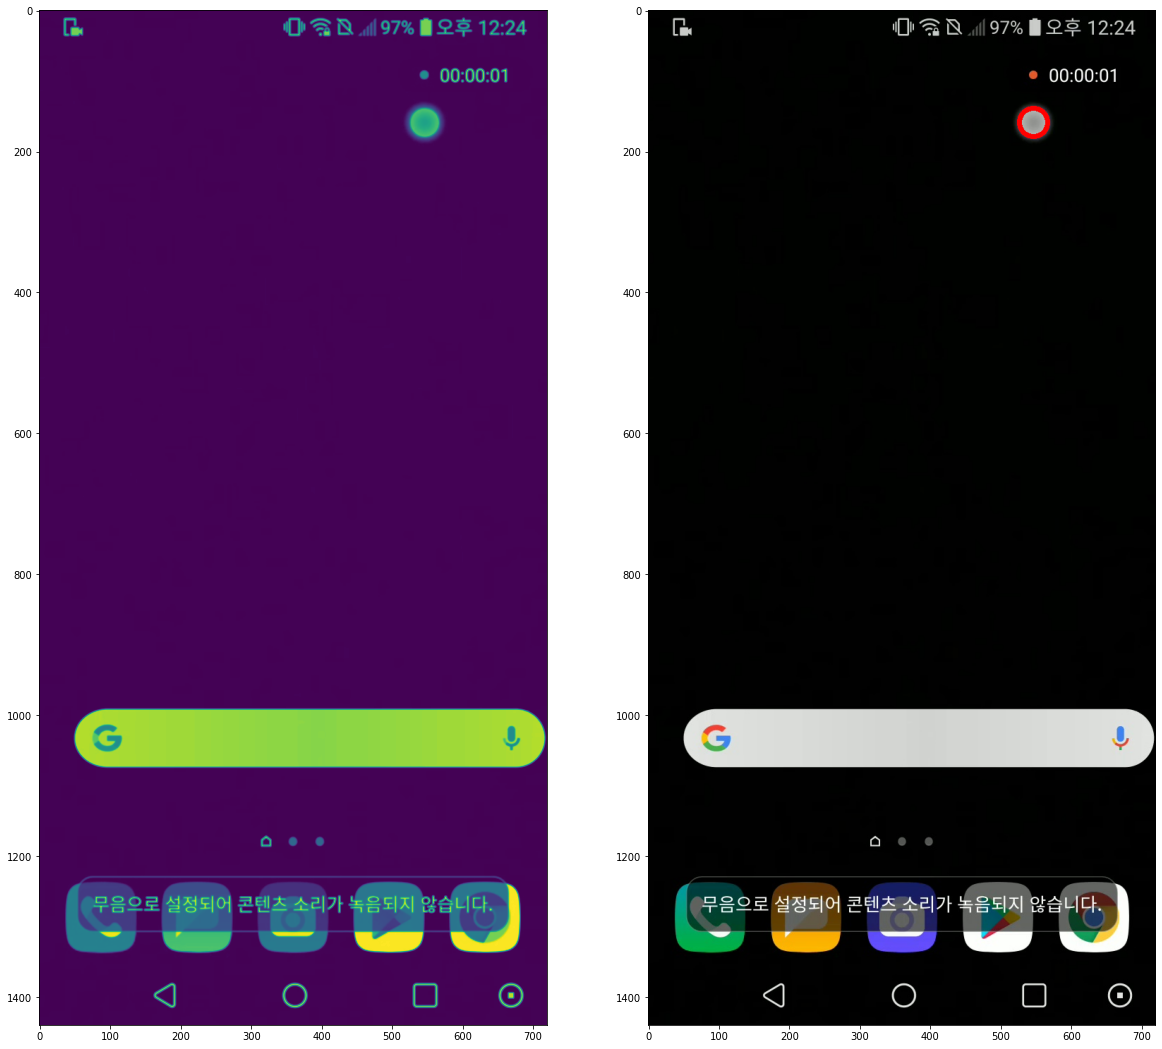

In [29]:
plt.rcParams['figure.figsize'] = [20, 20]
images = [image_gray_blur, drawing]

for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i])

